<a href="https://colab.research.google.com/github/Karson-Fye/ml-project-jkk/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

We will be using the [Titanic](https://www.openml.org/d/40945) dataset. It contains information on people who were on the Titanic when it sank. Our data contains features such as age, sex, ticket class, and more. We will develop a machine learning algorithm to predict whether or not a passenger survived the sinking.

# Importing the data


In [ ]:
import pandas as pd
import os
from google.colab import drive

In [ ]:
!pwd
# Mounting your personal drive so we can use the csv file in our 'Code' folder
drive.mount('/content/drive')
!pwd
%cd '/content/drive/My Drive/Titanic_Code'
%ls

/content
Mounted at /content/drive
/content
/content/drive/MyDrive/Titanic/Titanic_Code
classifer.pkl  Flask_Classifier.ipynb  survived.csv  Titanic.ipynb
features.csv   mydecisiontree.png      titanic.csv


In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
# Grabbing column names for later
features = df.columns
#features = features[:12]
features

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# Analyzing Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [ ]:
# First look at the data itself
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Let's see what the data dimensions are 
df.shape

(1309, 14)

In [ ]:
# What are some of the statistics on the data
df.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [ ]:
# What will we be looking to categorize data into?
print(df.groupby('survived').size())

survived
0    809
1    500
dtype: int64


# Cleaning DataSet

In [ ]:
#remove columns that will not help in predictions (ie. their name would not help determine if they would've died)
bad_columns = ['name', 'home.dest', 'body', 'cabin', 'boat']
df.drop(labels=bad_columns, axis='columns', inplace=True)

In [ ]:
#columns with those removed
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.55,S
2,1,0,female,2,1,2,113781,151.55,S
3,1,0,male,30,1,2,113781,151.55,S
4,1,0,female,25,1,2,113781,151.55,S


In [ ]:
#this deals with letters in ticket numbers and weird ages
def ticketConvert(x):
  x = filter(str.isdigit, x)
  x = "".join(x)
  if x == '':
    x = '?'
  return x
df['ticket'] = df['ticket'].apply(lambda x: ticketConvert(x))

def ageConvert(x):
  if x == '?':
    return x
  else:
    x = float(x)
    x = round(x)
  return x
df['age'] = df['age'].apply(lambda x: ageConvert(x))

#Remove rows with NaN (or ?'s)
for col in df.columns:
  df[col] = df[col].apply(lambda x: np.nan if x == '?' else x)

df.dropna(axis=0, inplace=True, thresh=9)

#now let's convert 'sex' and 'embarked' to numeric values
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else x)
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else x)

df['embarked'] = df['embarked'].apply(lambda x: 0 if x == 'C' else x)
df['embarked'] = df['embarked'].apply(lambda x: 1 if x == 'Q' else x)
df['embarked'] = df['embarked'].apply(lambda x: 2 if x == 'S' else x)

#age, ticket, and fare were considered objects, changing to int64/float
df['age'] = df['age'].apply(lambda x: int(x))
df['ticket'] = df['ticket'].apply(lambda x: int(x))
df['fare'] = df['fare'].apply(lambda x: float(x))

In [ ]:
#here is the new data set
df.head(3)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,0,29,0,0,24160,211.3375,2
1,1,1,1,1,1,2,113781,151.5500,2
2,1,0,0,2,1,2,113781,151.5500,2


In [ ]:
#types all numbers now
df.dtypes

pclass        int64
survived      int64
sex           int64
age           int64
sibsp         int64
parch         int64
ticket        int64
fare        float64
embarked      int64
dtype: object

In [ ]:
#here is number of samples updated
df.shape

(1039, 9)

In [ ]:
X = df.loc[:, df.columns != 'survived']
y = df['survived']

# Visualizing Dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df['ticket']

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1301      2628
1304      2665
1306      2656
1307      2670
1308    315082
Name: ticket, Length: 1039, dtype: int64

In [ ]:
data_col = np.transpose(X.columns)
df['survived'] = df['survived'].apply(lambda x: "Survived" if x == 1 else "Didn't Survive")

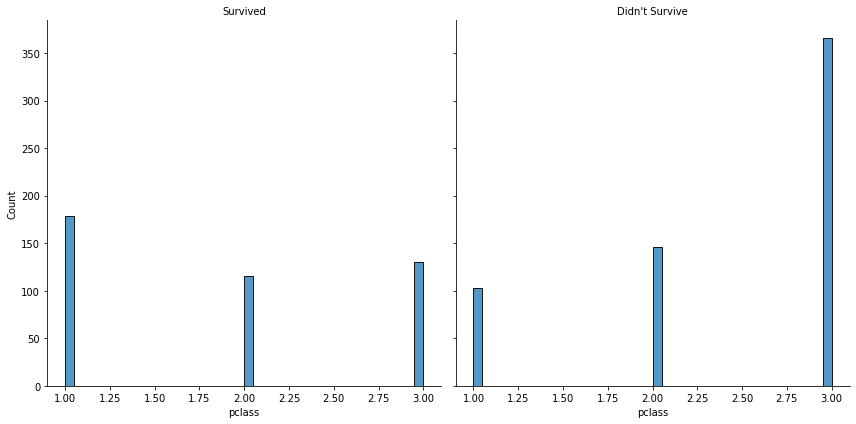

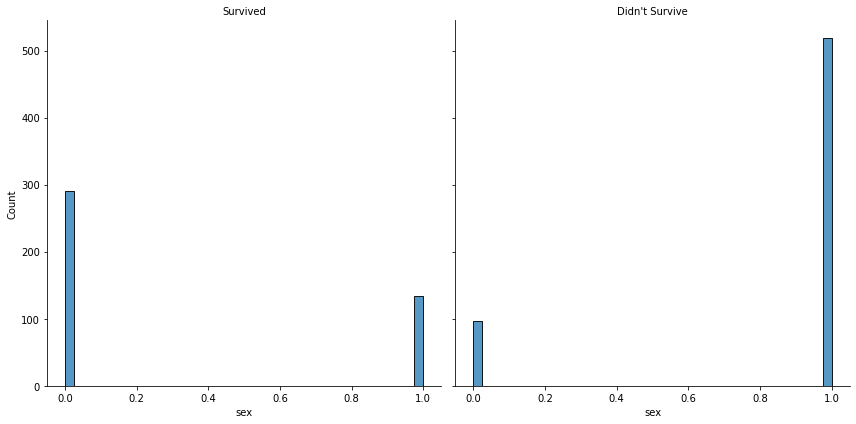

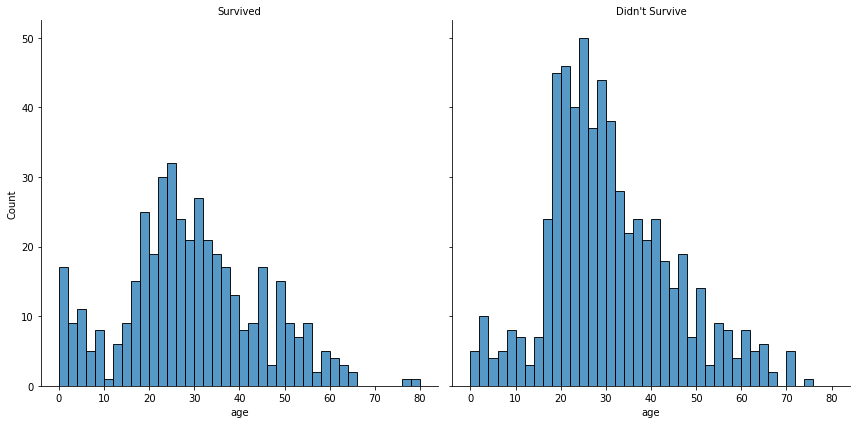

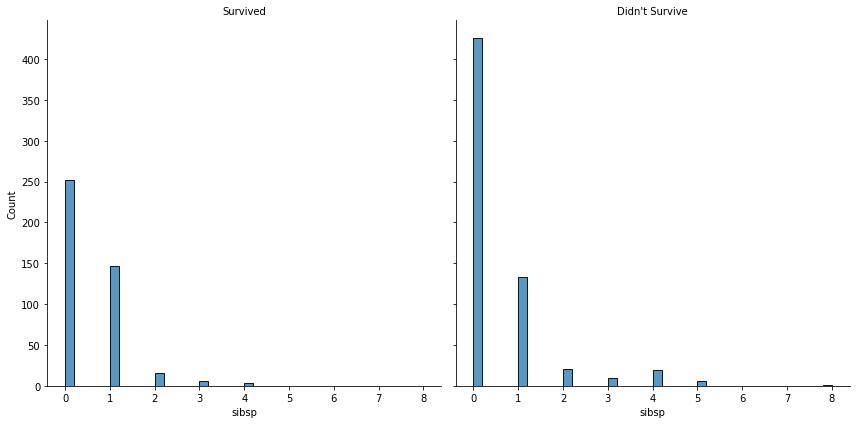

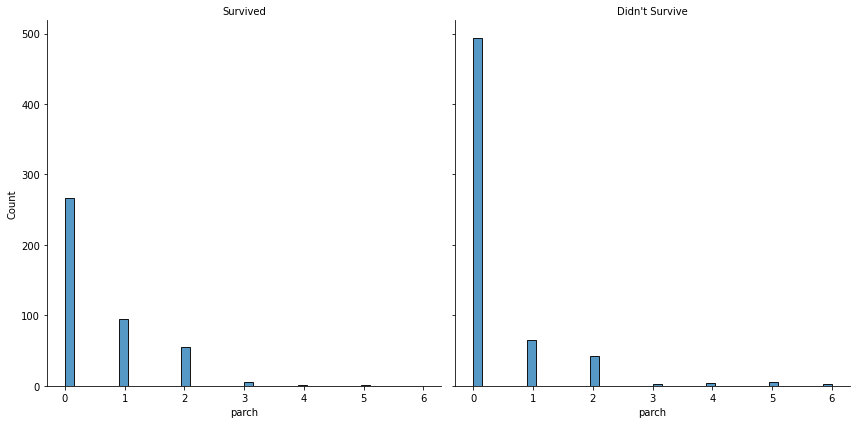

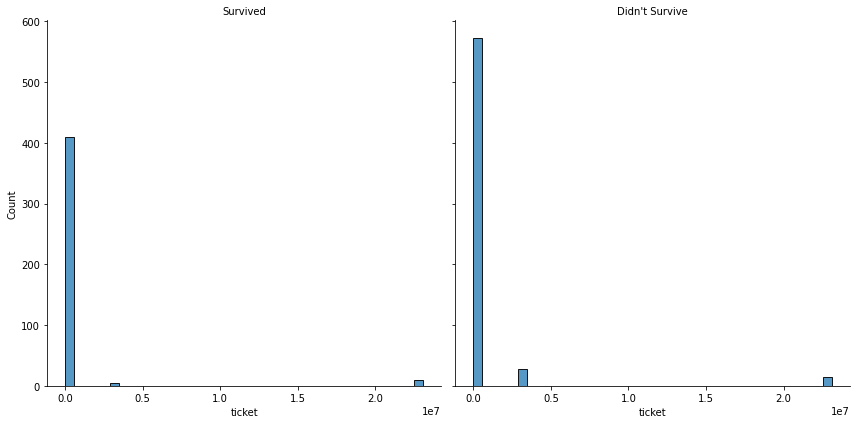

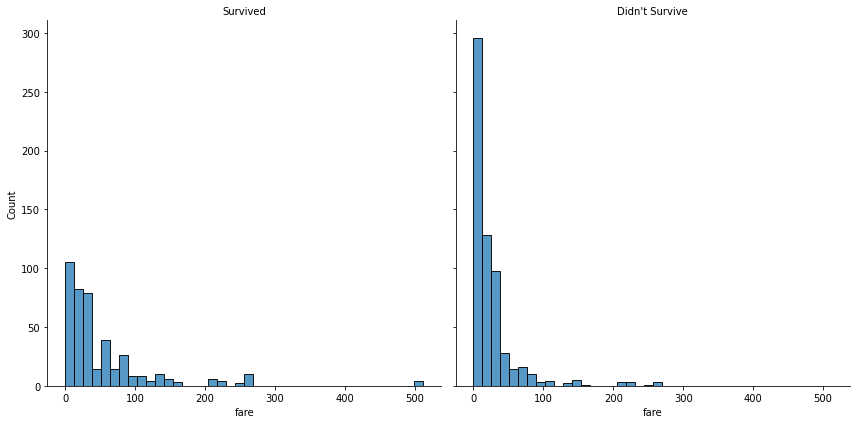

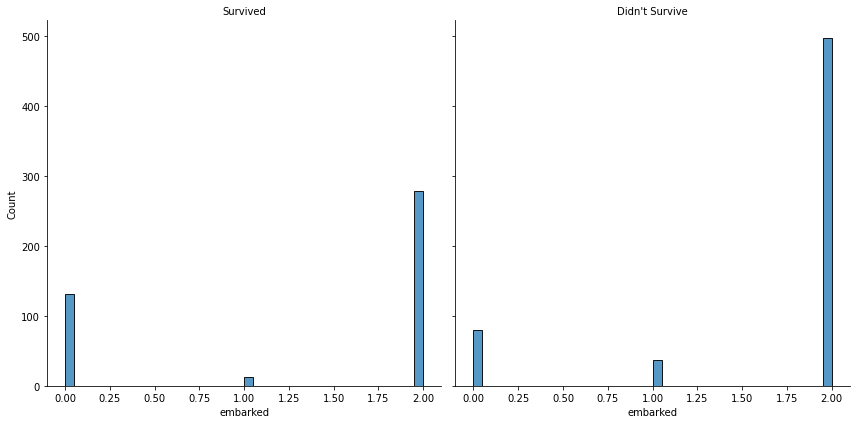

In [ ]:
for col in data_col:
  g = sns.displot(data=df, x=col, col='survived', height=6, bins=40)
  g.set_titles('{col_name}', fontsize=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


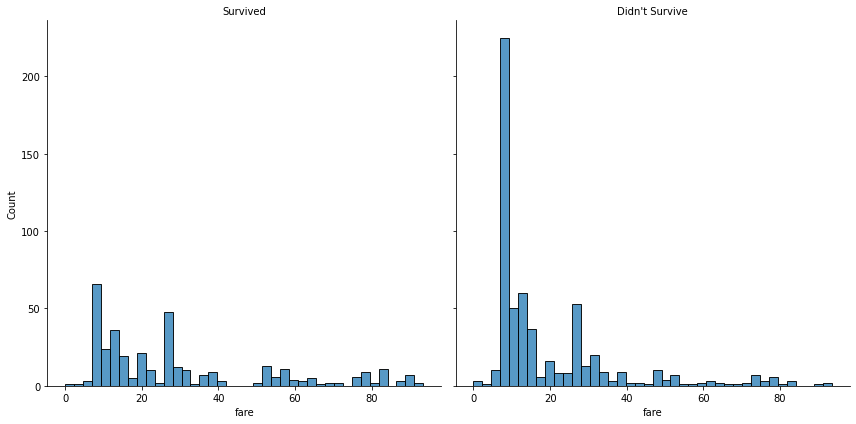

In [ ]:
fare = df[['fare', 'survived']]
fare['fare'] = fare['fare'].apply(lambda x: x if x < 100 else np.nan)
fare.dropna(axis=0, inplace=True)

g = sns.displot(data=fare, x=fare['fare'], col=fare['survived'], height=6, bins=40)
g.set_titles('{col_name}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


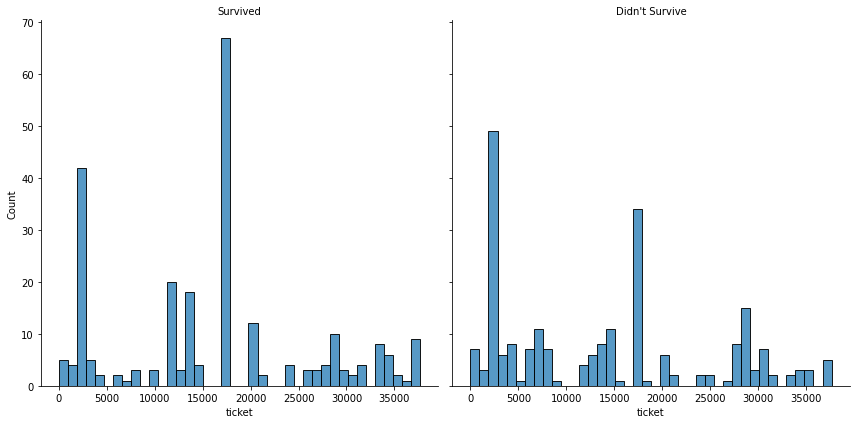

In [ ]:
tick = df[['ticket', 'survived']]
tick['ticket'] = tick['ticket'].apply(lambda x: x if x < 40000 else np.nan)
tick.dropna(axis=0, inplace=True)

g = sns.displot(data=tick, x=tick['ticket'], col=tick['survived'], height=6, bins=40)
g.set_titles('{col_name}')

# Feature Validation

## Correlation Heatmap

In [ ]:
X

,sex,pclass,fare,embarked,parch,age,ticket
0,0,1,211.3375,2,0,29,24160
1,1,1,151.5500,2,2,1,113781
2,0,1,151.5500,2,2,2,113781
3,1,1,151.5500,2,2,30,113781
4,0,1,151.5500,2,2,25,113781
...,...,...,...,...,...,...,...
1301,1,3,7.2250,0,0,46,2628
1304,0,3,14.4542,0,0,14,2665
1306,1,3,7.2250,0,0,26,2656
1307,1,3,7.2250,0,0,27,2670


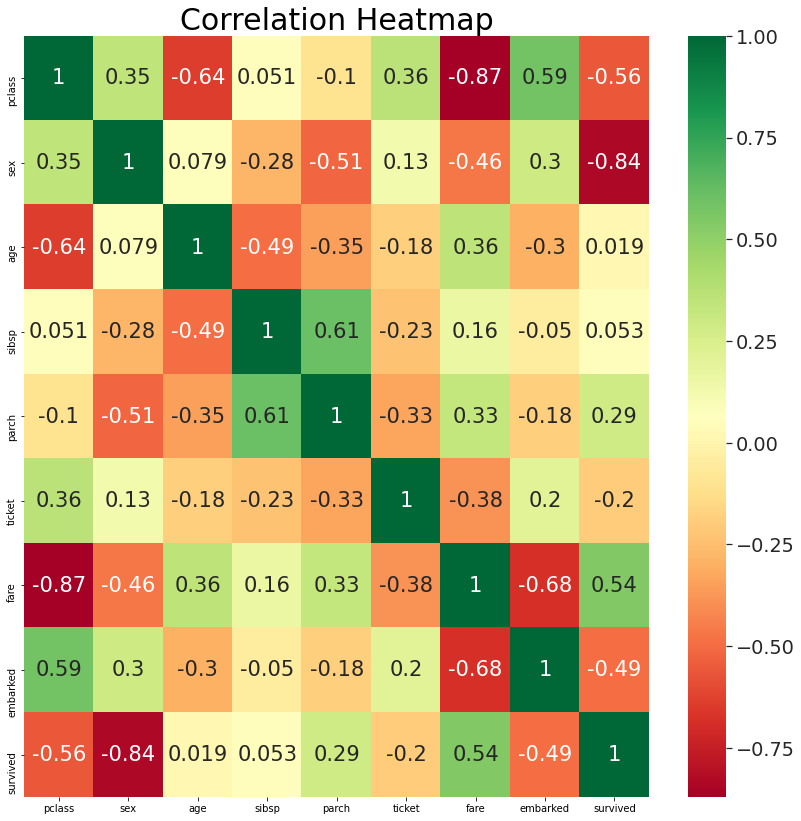

In [ ]:
corr = X
corr['survived'] = y
corr = corr.corr()
best_features = corr.index
plt.figure(figsize=(14,14))
plt.title('Correlation Heatmap', fontsize = 30)
sns.set(font_scale=1.75)
g = sns.heatmap(corr[best_features].corr(), annot=True, cmap='RdYlGn')

## Chi-Squared ($X^2$) Test

In [ ]:
# Import for normalization
from sklearn.preprocessing import MinMaxScaler
# Import chi2 function 
from sklearn.feature_selection import chi2
print("Chi^2 imports complete")

Chi^2 imports complete


In [ ]:
#splitting the data into feature (x) and target (y)

chi_X=X
chi_Y=y

#values must not be negative and must be scaled correctly, this fixes this
scaler = MinMaxScaler()
chi_X = pd.DataFrame( 
    scaler.fit_transform(chi_X), 
    columns=chi_X.columns 
)


## now we normalize the values

# Fit model
chi_scores = chi2(chi_X, chi_Y)

# Retrieve the P-Scores for each feature
p_vals = pd.Series(chi_scores[1],index = chi_X.columns)

# Sort by lower to higher p-values 
p_vals.sort_values(ascending=True, inplace=True)

print("\t X^2 p-values")
# Print all p-values in ascending order base on p-value, if they are >0.5, then mark them as red
p_vals

	 X^2 p-values


survived    9.146312e-136
sex          5.167042e-26
pclass       3.005693e-08
fare         1.170235e-03
embarked     2.681729e-03
parch        5.023907e-02
ticket       3.634346e-01
age          5.963354e-01
sibsp        8.592750e-01
dtype: float64

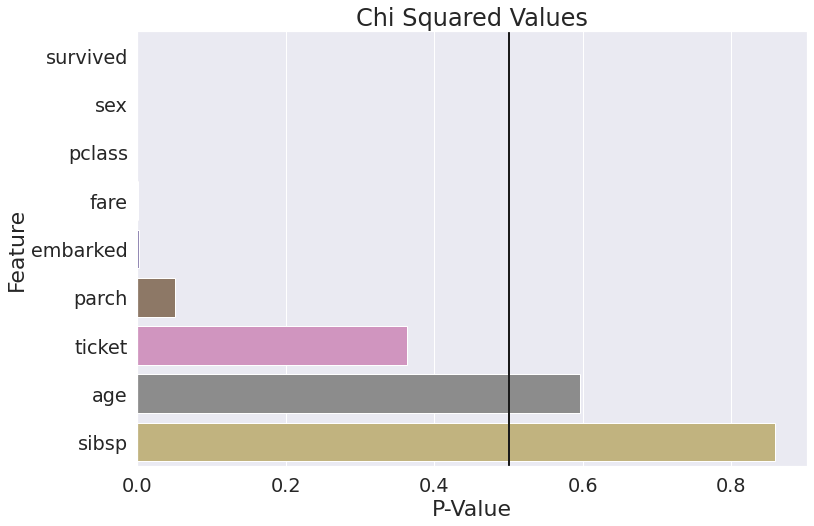

In [ ]:
# visualize data
plt.figure(figsize=(12, 8))
plt.title('Chi Squared Values', fontsize=24)
plt.xlabel('P-Value', fontsize=22)
plt.ylabel('Feature', fontsize=22)
plt.axvline(x=0.5,linewidth=2, color='k')
sns.set_theme(style="white")
sns.set(font_scale=1.5)
sns.barplot(x=p_vals, y=p_vals.index)

## Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

# Make a copy of df
pears_df = X.copy(deep=True)

# Stores the outcomes
pears_Y = y
# pears_df.drop(labels=['survived'], axis=1, inplace=True)

# Calculate r-value for each feature
# Store results in a dictionary with the label and r-value
pears_dict = {}
for i in pears_df.columns:
  corr, _ = pearsonr(pears_df[i], pears_Y) 
  pears_dict[pears_df[i].name] = corr

# Create data frames from the dictionaries
pears_df = pd.DataFrame.from_dict(pears_dict, orient='index')

# Rename the columns
pears_df.columns = ['r-value']

# Take the absolute value of all the r-values.
pears_df['r-value'] = pears_df['r-value'].abs()
pears_df.sort_values('r-value', inplace=True, ascending=False)
print('\t Pearson r-Values')
pears_df.squeeze()

	 Pearson r-Values


survived    1.000000
sex         0.536899
pclass      0.317654
fare        0.247671
embarked    0.202028
parch       0.115067
age         0.055838
ticket      0.034310
sibsp       0.012113
Name: r-value, dtype: float64

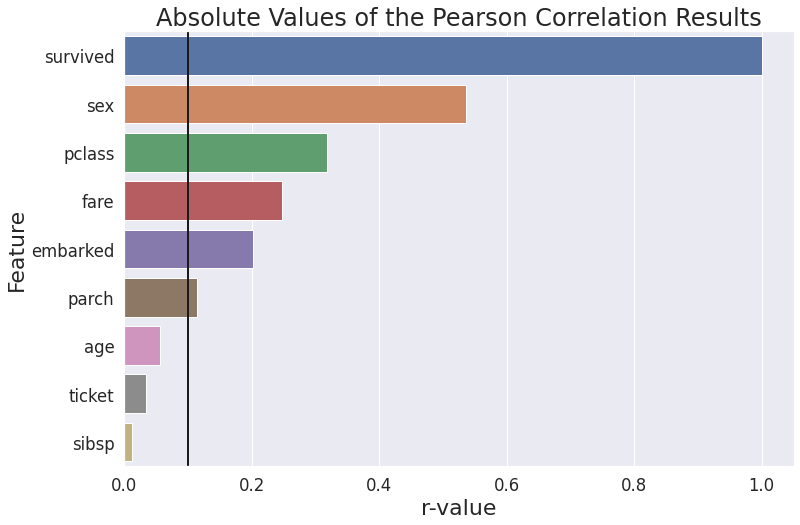

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Absolute Values of the Pearson Correlation Results", fontsize=24)

sns.barplot(x=pears_df['r-value'], y=pears_df.index)
plt.xlabel('r-value', fontsize=22)
plt.ylabel('Feature' ,fontsize=22)
sns.set(font_scale=1.5)
plt.axvline(x=0.1,linewidth=2, color='k')

## Selecting Features


In [ ]:
features = ['sex', 'pclass', 'fare', 'embarked', 'parch', 'age', 'ticket']
X = X[features]

# Prediction Algorithms


## Splitting DataSet


In [ ]:
X.to_csv(r'/content/drive/MyDrive/Titanic_Code/features.csv', index=False)
y.to_csv(r'/content/drive/MyDrive/Titanic_Code/survived.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=1)

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

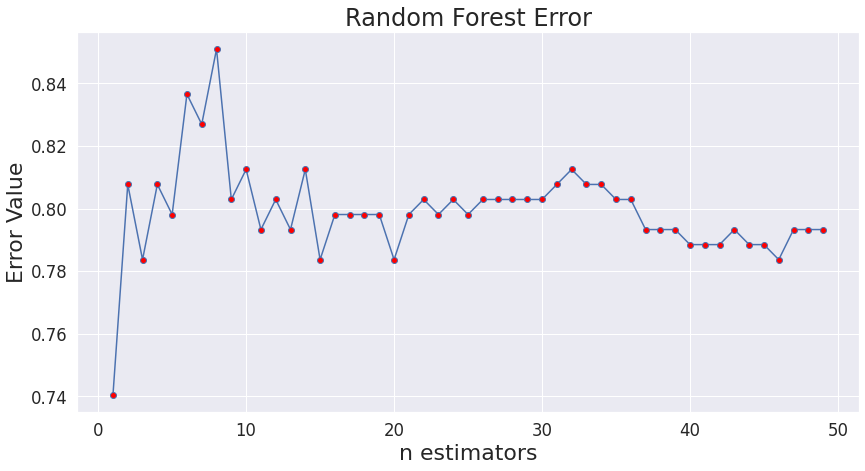

In [ ]:
rf_scores = []

for i in range(1,50):
  rf = RandomForestClassifier(random_state=0,n_estimators=i)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  rf_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(14,7))
plt.title('Random Forest Error', fontsize = 24)
plt.xlabel('n estimators', fontsize=22)
plt.ylabel('Error Value', fontsize=22)
plt.plot(range(1,50), rf_scores, marker='o', markerfacecolor='red')

In [ ]:
location = rf_scores.index(max(rf_scores))+1

rf = RandomForestClassifier(random_state=0,n_estimators=8)
rf.fit(X_train,y_train)
importance = sorted(zip(map(lambda x: round(x,4),rf.feature_importances_),
                        X), reverse=True)

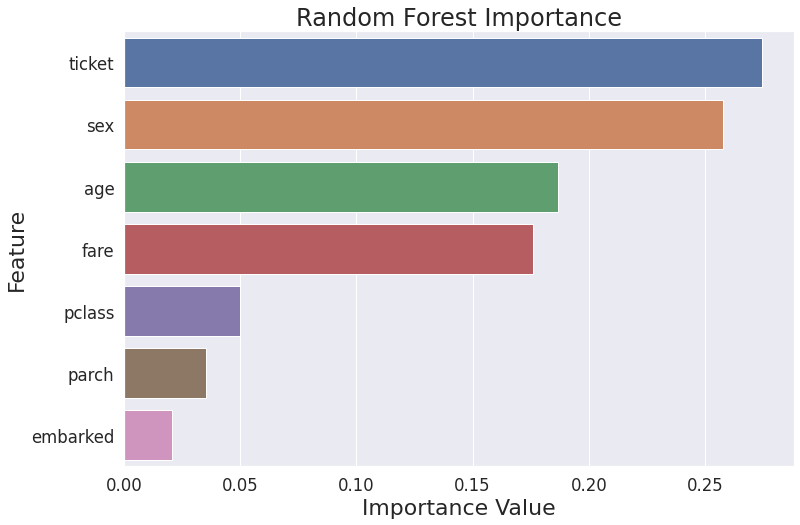

In [ ]:
labels = [row[1] for row in importance]
info = [row[0] for row in importance]
plt.figure(figsize=(12,8))
plt.title('Random Forest Importance', fontsize = 24)
plt.xlabel('Importance Value', fontsize=22)
plt.ylabel('Feature', fontsize=22)
sns.barplot(x=info, y=labels)

In [ ]:
#predicting accuracy for dataset
y_pred = rf.predict(X_test)

rf_final = metrics.accuracy_score(y_test, y_pred)
print(rf_final)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8509615384615384
[[112  11]
 [ 20  65]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       123
           1       0.86      0.76      0.81        85

    accuracy                           0.85       208
   macro avg       0.85      0.84      0.84       208
weighted avg       0.85      0.85      0.85       208



## Decision Tree

In [ ]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
dt_scores_1 = []
dt_scores_2 = []

for i in range(1,50):
  dt = DecisionTreeClassifier(random_state=1,max_depth=i)
  dt = dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  dt_scores_1.append(100 * metrics.accuracy_score(y_test, y_pred))

for i in range(2,50):
  dt = DecisionTreeClassifier(random_state=1,max_leaf_nodes=i)
  dt = dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  dt_scores_2.append(100 * metrics.accuracy_score(y_test, y_pred))
  
depmax = max(dt_scores_1)
deploc = dt_scores_1.index(depmax)+1
leafmax = max(dt_scores_2)
leafloc = dt_scores_2.index(leafmax)+2

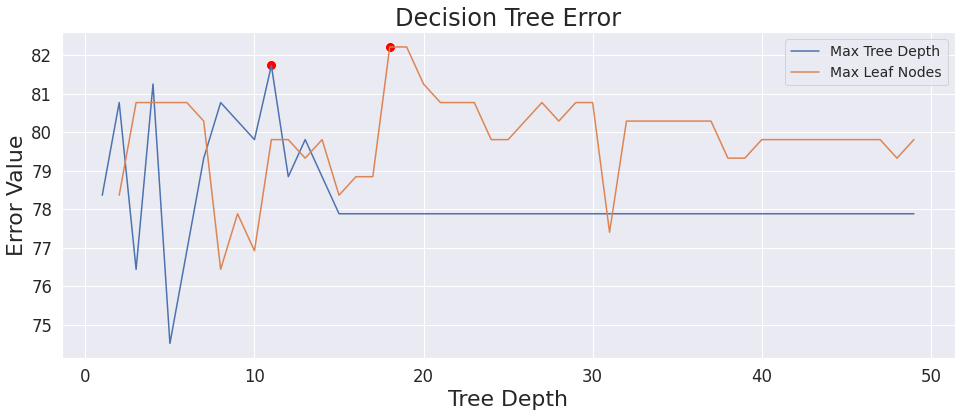

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Decision Tree Error', fontsize = 24)
plt.xlabel('Tree Depth', fontsize=22)
plt.ylabel('Error Value', fontsize=22)
plt.plot(range(1,50), dt_scores_1, markerfacecolor='red')
plt.plot(range(2,50), dt_scores_2, markerfacecolor='blue')
sns.scatterplot(x=[deploc,leafloc],y=[depmax,leafmax],s=100,color='red')
plt.legend(('Max Tree Depth', 'Max Leaf Nodes'), fontsize=14)

In [ ]:
dt = DecisionTreeClassifier(random_state=1, max_depth=deploc, max_leaf_nodes=leafloc)
dt = dt.fit(X_train, y_train)

importance = sorted(zip(map(lambda x: round(x,4),dt.feature_importances_),
                        X), reverse=True)

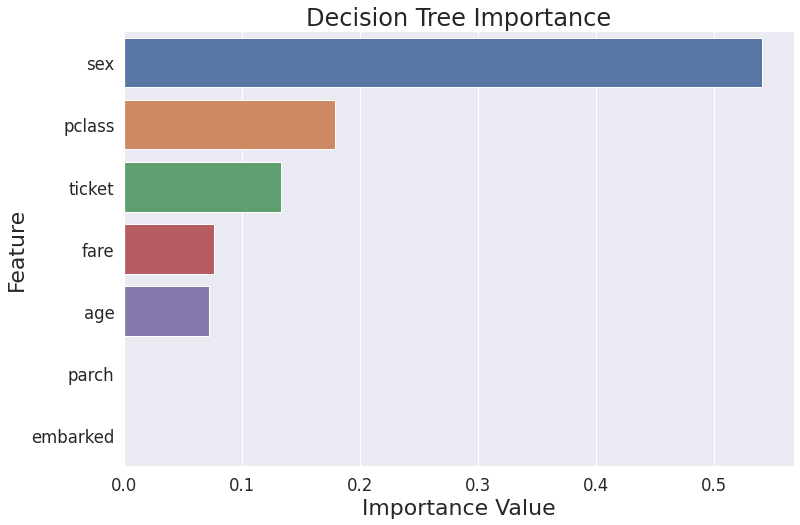

In [ ]:
labels = [row[1] for row in importance]
info = [row[0] for row in importance]
plt.figure(figsize=(12,8))
plt.title('Decision Tree Importance', fontsize = 24)
plt.xlabel('Importance Value', fontsize=22)
plt.ylabel('Feature', fontsize=22)
sns.barplot(x=info, y=labels)

In [ ]:
y_pred = dt.predict(X_test)

dt_final = metrics.accuracy_score(y_test, y_pred)
print(dt_final)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8221153846153846
[[107  16]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       123
           1       0.80      0.75      0.78        85

    accuracy                           0.82       208
   macro avg       0.82      0.81      0.81       208
weighted avg       0.82      0.82      0.82       208



## K-Nearest Neighbor

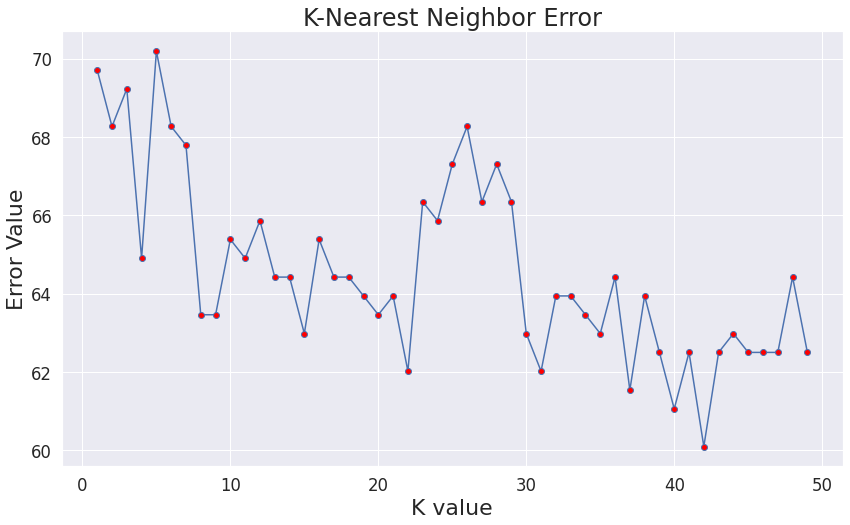

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
  
#finding the best k value for or knn data
knn_scores = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn = knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_scores.append(100 * metrics.accuracy_score(y_test, y_pred)) 

plt.figure(figsize=(14,8))
plt.title('K-Nearest Neighbor Error', fontsize = 24)
plt.xlabel('K value', fontsize=22)
plt.ylabel('Error Value', fontsize=22)
plt.plot(range(1,50), knn_scores, marker='o', markerfacecolor='red')

In [ ]:
#grabs higheset k-value
max_percent = max(knn_scores)
max_k = knn_scores.index(max_percent) + 1
print('Max k value = ', max_k)

Max k value =  5


In [ ]:
#we use highest k value (giving the greatest accuracy)
knn = KNeighborsClassifier(n_neighbors=max_k)
knn = knn.fit(X_train, y_train)
#feature importance is not a function of knn

In [ ]:
y_pred = knn.predict(X_test)

knn_final = metrics.accuracy_score(y_test, y_pred)
print(knn_final)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.7019230769230769
[[92 31]
 [31 54]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       123
           1       0.64      0.64      0.64        85

    accuracy                           0.70       208
   macro avg       0.69      0.69      0.69       208
weighted avg       0.70      0.70      0.70       208



## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [ ]:
ada_final = metrics.accuracy_score(y_test, y_pred)

print(ada_final)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.75
[[98 25]
 [27 58]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.70      0.68      0.69        85

    accuracy                           0.75       208
   macro avg       0.74      0.74      0.74       208
weighted avg       0.75      0.75      0.75       208



## Gaussian Process


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier(random_state=1)
gp.fit(X_train, y_train)

y_pred = gp.predict(X_test)

In [ ]:
gp_final = metrics.accuracy_score(y_test, y_pred)

print(gp_final)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.6971153846153846
[[96 27]
 [36 49]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       123
           1       0.64      0.58      0.61        85

    accuracy                           0.70       208
   macro avg       0.69      0.68      0.68       208
weighted avg       0.69      0.70      0.69       208



## XGBoost Testing

In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

xg_final = accuracy_score(y_test, best_preds)

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8123845630407309
Recall = 0.8073648971783836
Accuracy = 0.8173076923076923


# Analysis of Results

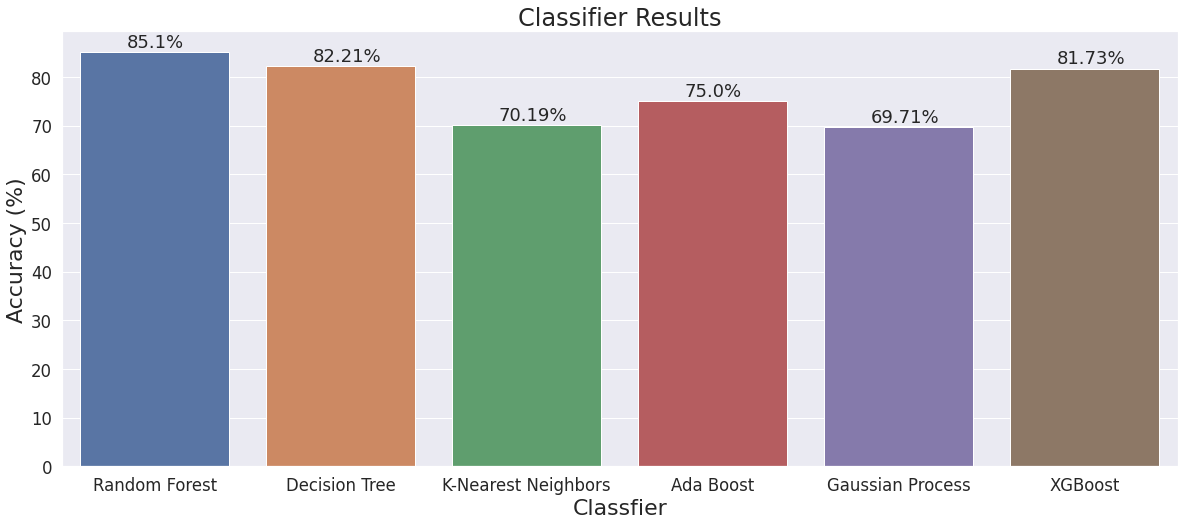

In [ ]:
tests = [
         'Random Forest',
         'Decision Tree',
         'K-Nearest Neighbors',
         'Ada Boost',
         'Gaussian Process',
         'XGBoost'
]
results = [
           rf_final,
           dt_final,
           knn_final,
           ada_final,
           gp_final,
           xg_final
]
results = [100*x for x in results]

plt.figure(figsize=(20,8))
plt.title('Classifier Results', fontsize=24)
plt.ylabel('Accuracy (%)', fontsize=22)
plt.xlabel('Classfier', fontsize = 22)
sns.barplot(x=tests, y=results)
for i in range(len(results)):
  plt.text(i-.15,results[i]+1,str(round(results[i],2))+'%')